# 1. Eksplorasi Data

In [1]:
#Digunakan library/paket 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
plt.style.use(['notebook', 'grid'])

In [2]:
#Digunakan data PET (file dalam bentuk excel)
df=pd.read_excel('data_pet.xlsx')
df.tail()

,C,V,F,R,ω,L,D,Q
28,12.0,12.0,0.5,4.000000,500,15,240.0,Halus
29,15.0,14.0,2.0,1.000000,0,21,193.0,Halus
30,15.0,15.5,2.0,1.000000,0,22,220.0,Halus
31,12.0,15.0,0.5,2.333333,0,15,120.0,Bermanik
32,20.0,15.0,0.5,2.333333,0,15,490.0,Halus


In [3]:
#Statistika deskriptif
np.round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
C,33.0,17.96,7.06,7.70,12.0,20.00,22.50,30.0
V,33.0,18.05,6.15,10.00,14.0,15.00,26.00,26.0
F,33.0,3.82,5.11,0.05,0.5,1.00,12.00,12.0
R,33.0,1.66,1.14,0.33,1.0,1.00,2.33,4.0
ω,33.0,417.58,465.93,0.00,0.0,300.00,900.00,2000.0
L,33.0,14.15,2.76,10.00,12.0,15.00,15.00,22.0
D,33.0,491.31,334.91,105.00,215.0,471.58,680.00,1800.0


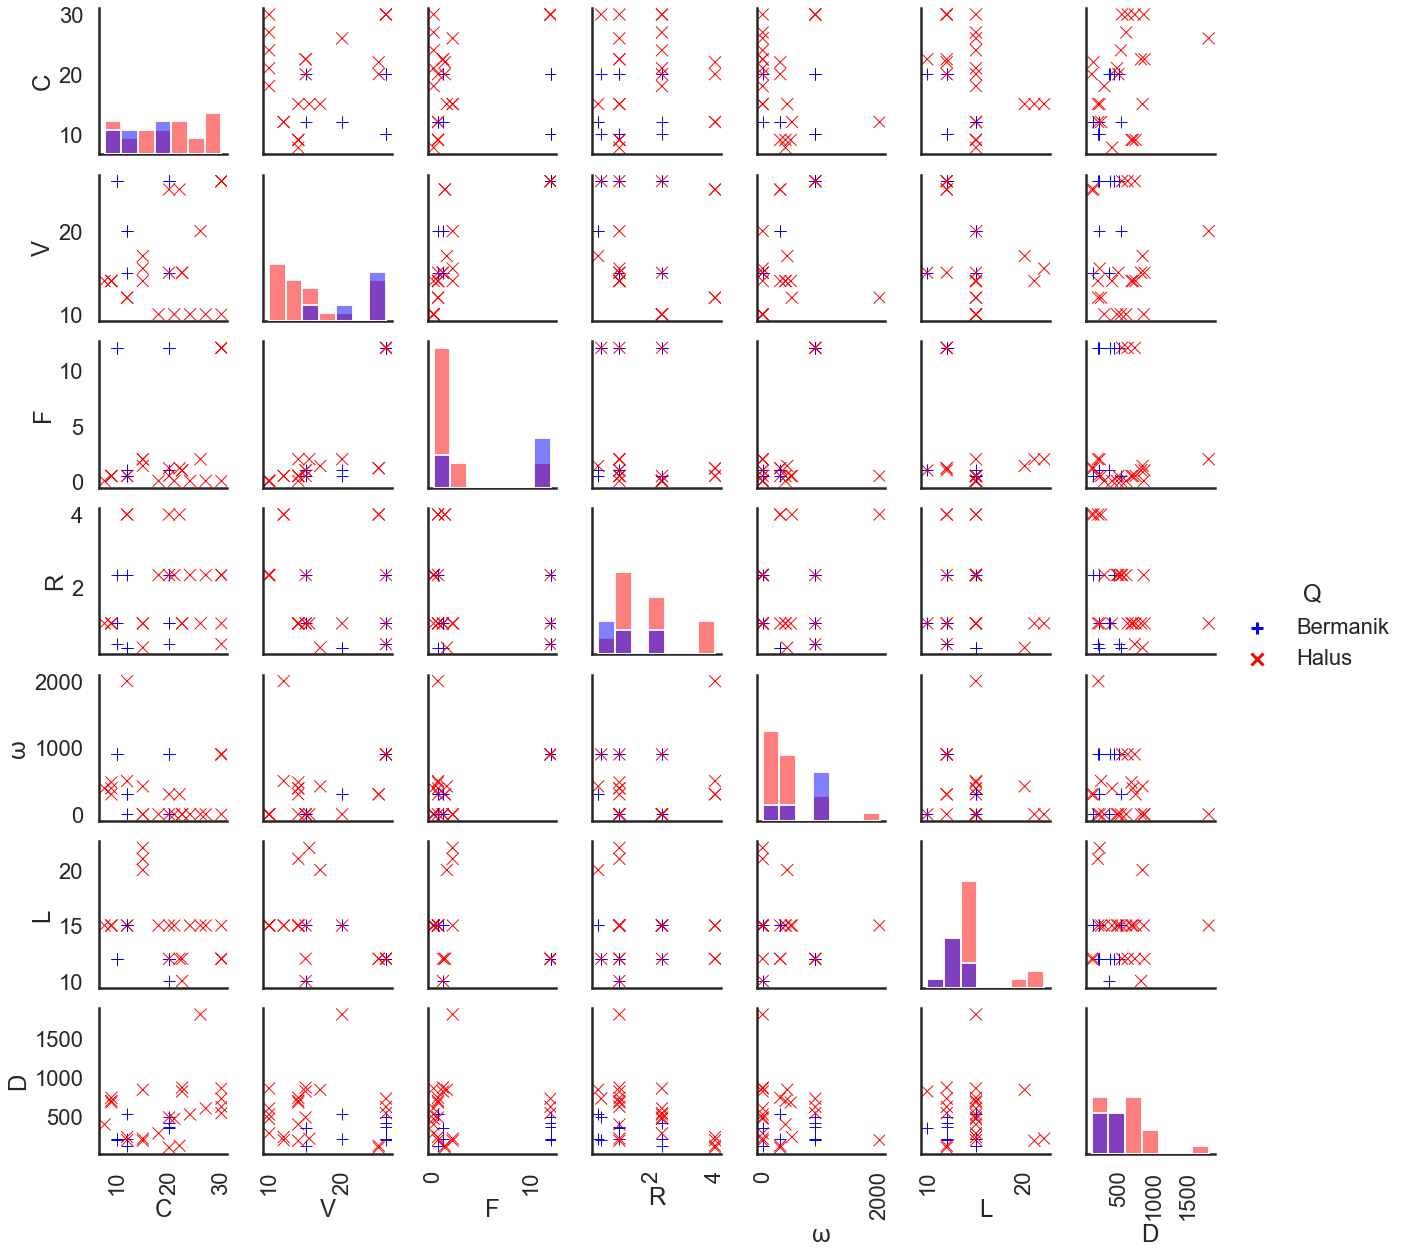

In [4]:
#Plot pasangan variabel dan histogram
sns.set_style("white")
sns.set_context("poster")
palette = ["#0000FF", "#FF0000"]

g = sns.pairplot(data=df, hue="Q", markers=["+", "x"],  
                diag_kind="hist", 
                palette=sns.color_palette(palette, 2))
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)

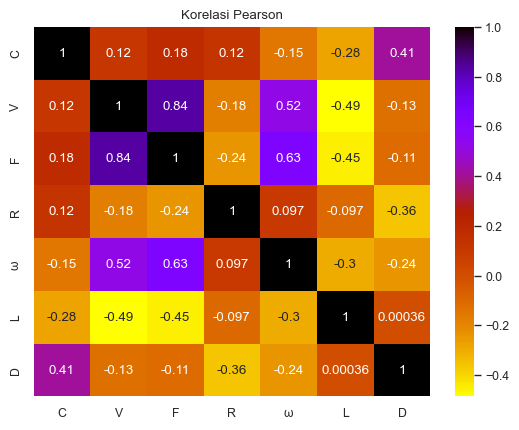

In [8]:
#Korelasi Pearson
sns.set_style("white")
sns.set_context("paper")
sns.heatmap(df.corr(method='pearson'), cmap='gnuplot_r', annot=True)
plt.title('Korelasi Pearson');

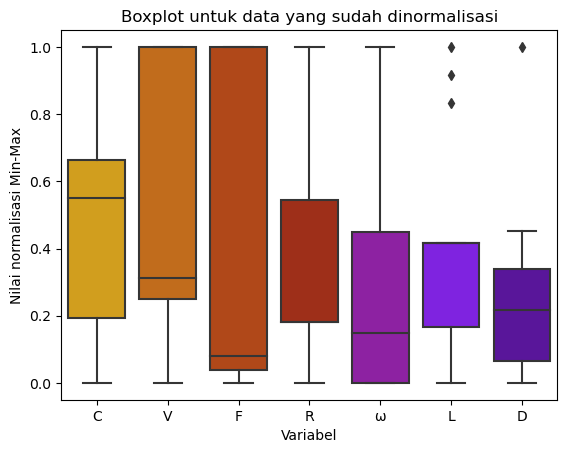

In [11]:
#Boxplot untuk data yang sudah ditransformasi min-max
from sklearn.preprocessing import MinMaxScaler
scaler_minmax= MinMaxScaler()
df_scaled=pd.DataFrame(scaler_minmax.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
sns.boxplot(x="variable", y="value", data=pd.melt(df_scaled), palette='gnuplot_r')
plt.xlabel('Variabel')
plt.ylabel('Nilai normalisasi Min-Max')
plt.title('Boxplot untuk data yang sudah dinormalisasi');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


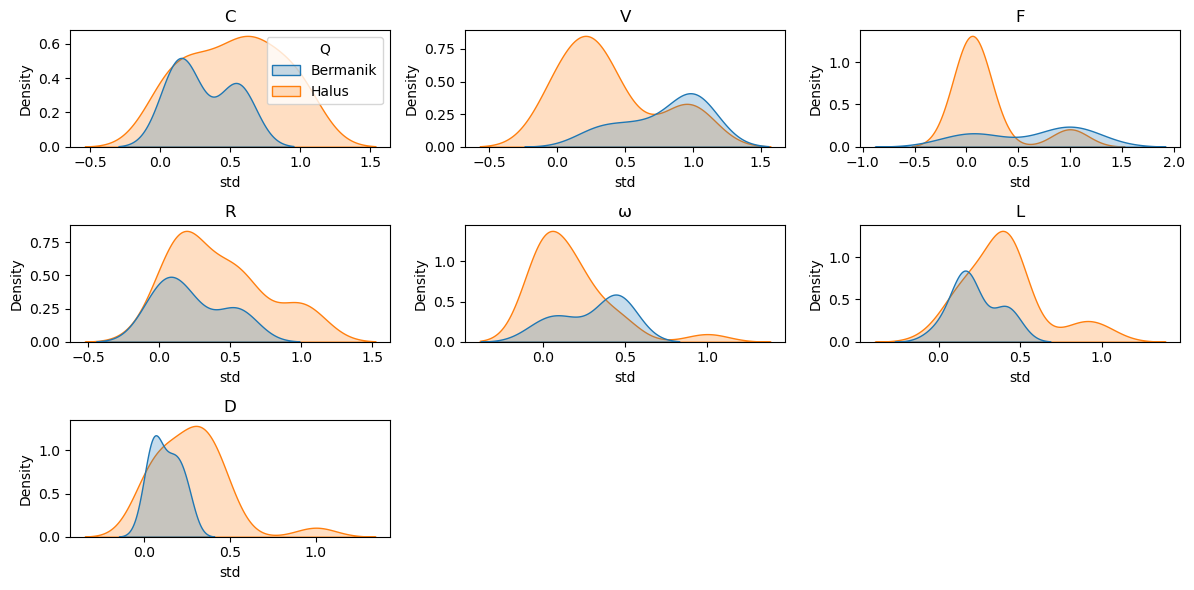

In [12]:
#KDE plot
plt.style.use('default')
df_scaled['Q']=df['Q']
plt.subplots(2, 3, figsize=(12,6))
for num,col in enumerate(df_scaled.columns[:-1]):
    plt.subplot(3, 3,num+1)
    sns.kdeplot(data=df_scaled, x=col, hue='Q', shade=True)
    plt.title(col)
    plt.xlabel('std')
    
    if num != 0:
        plt.legend().remove()

plt.tight_layout();

# 2. Regresi Linier Berganda

In [13]:
#Transformasi data 
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

df_rlb=pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])
df_rlb.tail()

,C,V,F,R,ω,L,D
28,-0.857492,-0.998299,-0.659580,2.080306,0.179647,0.311882,-0.762019
29,-0.425912,-0.668035,-0.361721,-0.581206,-0.910122,2.517334,-0.904531
30,-0.425912,-0.420336,-0.361721,-0.581206,-0.910122,2.884910,-0.822663
31,-0.857492,-0.502902,-0.659580,0.601689,-0.910122,0.311882,-1.125880
32,0.293387,-0.502902,-0.659580,0.601689,-0.910122,0.311882,-0.003977


In [15]:
#Tabulasi model regresi
import statsmodels.api as sm
X = sm.add_constant(df_rlb.iloc[:, :-1])  
Y = df_rlb.iloc[:,-1] 
model_1= sm.OLS(Y, X).fit() 
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      D   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     3.708
Date:                Sun, 18 Jun 2023   Prob (F-statistic):            0.00851
Time:                        14:56:09   Log-Likelihood:                -36.623
No. Observations:                  33   AIC:                             87.25
Df Residuals:                      26   BIC:                             97.72
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.804e-16      0.144   1.25e-15      1.000      -0.296       0.296
C              0.5931      0.170      3.492      0.002       0.244       0.942
V             -0.0178      0.272     -0.065      0.948      -0.577       0.541
F             -0.5163      0.328     -1.572      0.128      -1.191       0.159
R             -0.5895      0.169     -3.480      0.002      -0.938      -0.241
ω              0.2222      0.219      1.012      0.321      -0.229       0.673
L             -0.0679      0.174     -0.390      0.700      -0.426       0.290
==============================================================================
Omnibus:                       28.037   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.282
Skew:                           1.852   Prob(JB):                     2.45e-15
Kurtosis:                       8.934   Cond. No.                         4.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0.461134680597446,
                coef  std err             t  P>|t|  [0.025  0.975]
 const  1.804000e-16    0.144  1.250000e-15  1.000  -0.296   0.296
 C      5.931000e-01    0.170  3.492000e+00  0.002   0.244   0.942
 V     -1.780000e-02    0.272 -6.500000e-02  0.948  -0.577   0.541
 F     -5.163000e-01    0.328 -1.572000e+00  0.128  -1.191   0.159
 R     -5.895000e-01    0.169 -3.480000e+00  0.002  -0.938  -0.241
 ω      2.222000e-01    0.219  1.012000e+00  0.321  -0.229   0.673
 L     -6.790000e-02    0.174 -3.900000e-01  0.700  -0.426   0.290,
 <Figure size 800x600 with 1 Axes>)

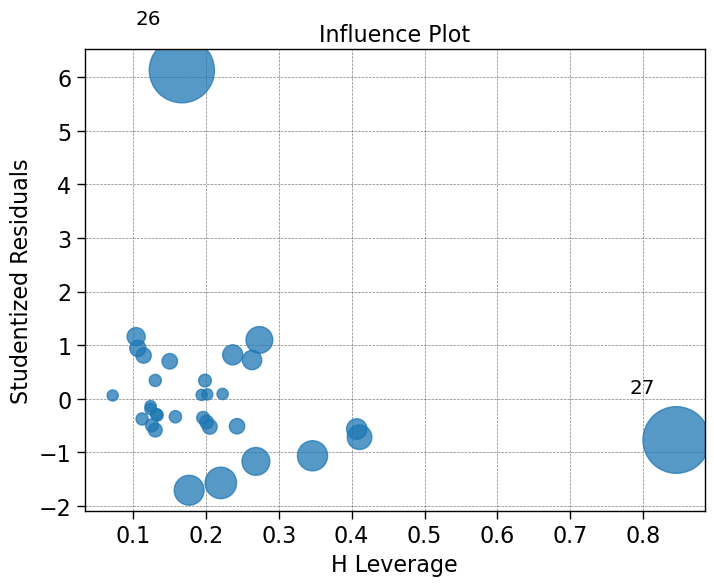

In [20]:
# Deteksi Outlier
def deteksi_outlier(data):
    scaler= StandardScaler()
    data_std=pd.DataFrame(scaler.fit_transform(data.iloc[:, :-1]), columns=data.columns[:-1])
    X = sm.add_constant(data_std.iloc[:, :-1])  
    Y = data_std.iloc[:,-1] 
    model= sm.OLS(Y, X).fit() 
    r_2=model.rsquared
    uji_beta=pd.read_html(model.summary().tables[1].as_html(), header=0, index_col=0)[0]
    return r_2, uji_beta,sm.graphics.influence_plot(model, criterion="cooks")
deteksi_outlier(df)

In [23]:
# Diagnostik Regresi Lanjut: 
# https://www.statsmodels.org/dev/examples/notebooks/generated/linear_regression_diagnostics_plots.html
import statsmodels
import statsmodels.formula.api as smf
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

style_talk = 'seaborn-talk'    #refer to plt.style.available

class LinearRegDiagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Authors:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)

        Matt Spinelli (m3spinelli@gmail.com, where 3 = r)
        (1) Fixed incorrect annotation of the top most extreme residuals in
            the Residuals vs Fitted and, especially, the Normal Q-Q plots.
        (2) Changed Residuals vs Leverage plot to match closer the y-axis
            range shown in the equivalent plot in the R package ggfortify.
        (3) Added horizontal line at y=0 in Residuals vs Leverage plot to
            match the plots in R package ggfortify and base R.
        (4) Added option for placing a vertical guideline on the Residuals
            vs Leverage plot using the rule of thumb of h = 2p/n to denote
            high leverage (high_leverage_threshold=True).
        (5) Added two more ways to compute the Cook's Distance (D) threshold:
            * 'baseR': D > 1 and D > 0.5 (default)
            * 'convention': D > 4/n
            * 'dof': D > 4 / (n - k - 1)
        (6) Fixed class name to conform to Pascal casing convention
        (7) Fixed Residuals vs Leverage legend to work with loc='best'
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)
        self.nresids = len(self.residual_norm)

    def __call__(self, plot_context='seaborn-paper', **kwargs):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(
                ax=ax[1,1],
                high_leverage_threshold = kwargs.get('high_leverage_threshold'),
                cooks_threshold = kwargs.get('cooks_threshold'))
            plt.show()

        return self.vif_table(), fig, ax,

    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.argsort(residual_abs), 0)
        abs_resid_top_3 = abs_resid[:3]
        for i in abs_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        fig = QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for i, x, y in self.__qq_top_resid(QQ.theoretical_quantiles, abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(x, y),
                ha='right',
                color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')

        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None, high_leverage_threshold=False, cooks_threshold='baseR'):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        factors = []
        if cooks_threshold == 'baseR' or cooks_threshold is None:
            factors = [1, 0.5]
        elif cooks_threshold == 'convention':
            factors = [4/self.nresids]
        elif cooks_threshold == 'dof':
            factors = [4/ (self.nresids - self.nparams)]
        else:
            raise ValueError("threshold_method must be one of the following: 'convention', 'dof', or 'baseR' (default)")
        for i, factor in enumerate(factors):
            label = "Cook's distance" if i == 0 else None
            xtemp, ytemp = self.__cooks_dist_line(factor)
            ax.plot(xtemp, ytemp, label=label, lw=1.25, ls='--', color='red')
            ax.plot(xtemp, np.negative(ytemp), lw=1.25, ls='--', color='red')

        if high_leverage_threshold:
            high_leverage = 2 * self.nparams / self.nresids
            if max(self.leverage) > high_leverage:
                ax.axvline(high_leverage, label='High leverage', ls='-.', color='purple', lw=1)

        ax.axhline(0, ls='dotted', color='black', lw=1.25)
        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_ylim(min(self.residual_norm)-0.1, max(self.residual_norm)+0.1)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        plt.legend(loc='best')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        return (vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y


    def __qq_top_resid(self, quantiles, top_residual_indices):
        """
        Helper generator function yielding the index and coordinates
        """
        offset = 0
        quant_index = 0
        previous_is_negative = None
        for resid_index in top_residual_indices:
            y = self.residual_norm[resid_index]
            is_negative = y < 0
            if previous_is_negative == None or previous_is_negative == is_negative:
                offset += 1
            else:
                quant_index -= offset
            x = quantiles[quant_index] if is_negative else np.flip(quantiles, 0)[quant_index]
            quant_index += 1
            previous_is_negative = is_negative
            yield resid_index, x, y

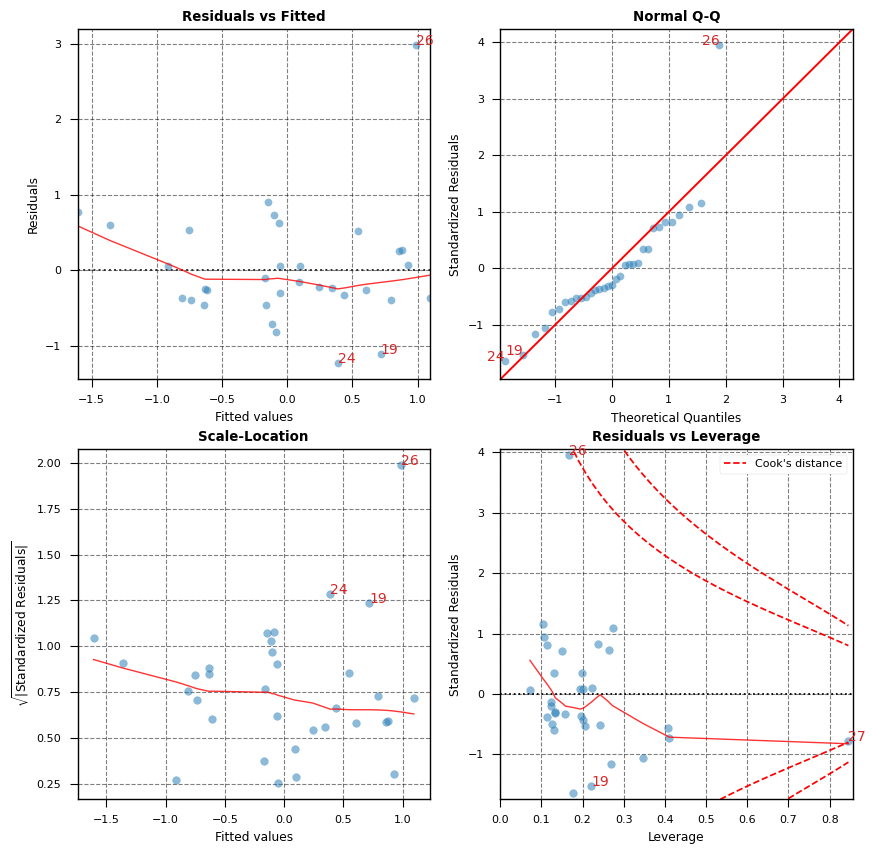

  Features  VIF Factor
0    const        1.00
4        R        1.38
1        C        1.39
6        L        1.47
5        ω        2.32
2        V        3.57
3        F        5.21


In [24]:
cls = LinearRegDiagnostic(model_1)
vif, fig, ax = cls()
print(vif)

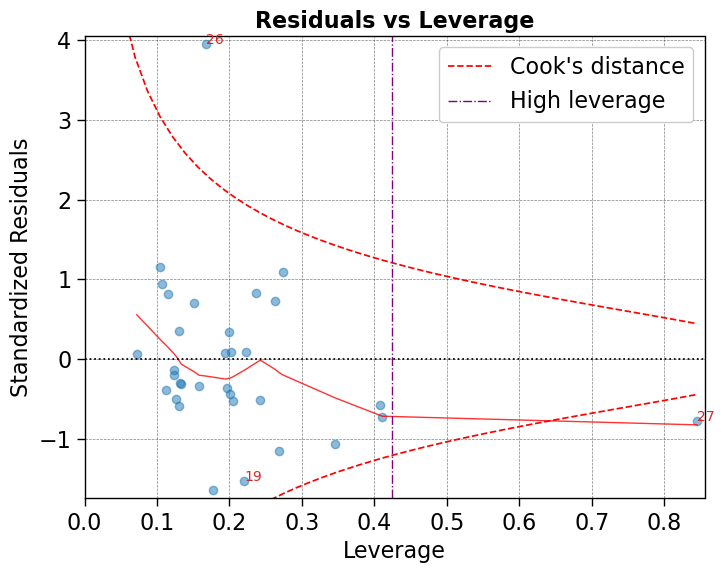

In [25]:
cls.leverage_plot(high_leverage_threshold=True, cooks_threshold='dof');

In [33]:
#Regresi Lasso
from matplotlib.lines import Line2D
from sklearn.linear_model import Lasso


X= df_rlb.iloc[:, :-1] 
y = df_rlb.iloc[:,-1] 
model = sm.OLS(y, X)
results_fu = model.fit()
coefs = []
r_2=[]
alphas = np.logspace(-4, 1, 30)
for n in  alphas.tolist():
    results_fr = model.fit_regularized(L1_wt=1, alpha=n, start_params=results_fu.params)

    results_fr_fit = sm.regression.linear_model.OLSResults(model, 
                                                           results_fr.params, 
                                                           model.normalized_cov_params)
    coefs.append(results_fr.params)
    r_2.append(results_fr_fit.rsquared)
    results_fr_fit.

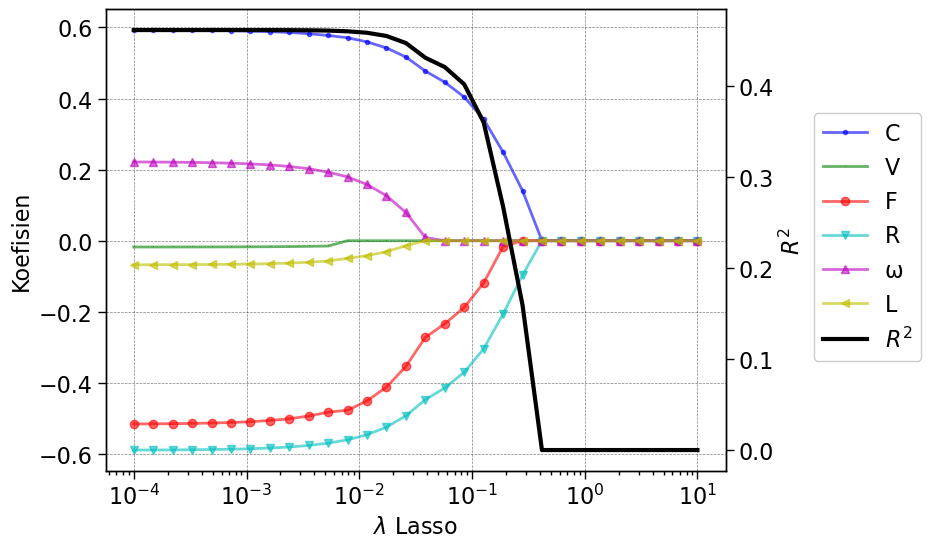

In [35]:
#Visualisasi Lasso
fig, ax1 = plt.subplots()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
marker = list(Line2D.markers)
for i, coef in enumerate(np.array(coefs).T):
    ax1.plot(alphas, coef, marker=marker[i % len(marker)],color=colors[i % len(colors)], label=df.columns[i], alpha=0.6)
ax1.set_xscale("log")
ax1.set_xlabel("$\lambda$ Lasso")
ax1.set_ylabel("Koefisien")

ax2=ax1.twinx()
ax2.plot(alphas, r_2, color='black', label='$R^2$', linewidth=3)
ax2.set_ylabel('$R^2$')
ax2.grid(False)
fig.legend(bbox_to_anchor=(1.01, 0.5), loc="center left", borderaxespad=0, ncol=1);

In [37]:
#Regresi RIdge
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge

X= df_rlb.iloc[:, :-1] 
y = df_rlb.iloc[:,-1] 
# Fit the Lasso regression model with different alpha values
alphas = np.logspace(-4, 3, 30)
coefs = []
r_2=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    y_pred = ridge.predict(X)
    r_2.append(1 - ((y - y_pred)**2).sum() / ((y - y.mean())**2).sum())

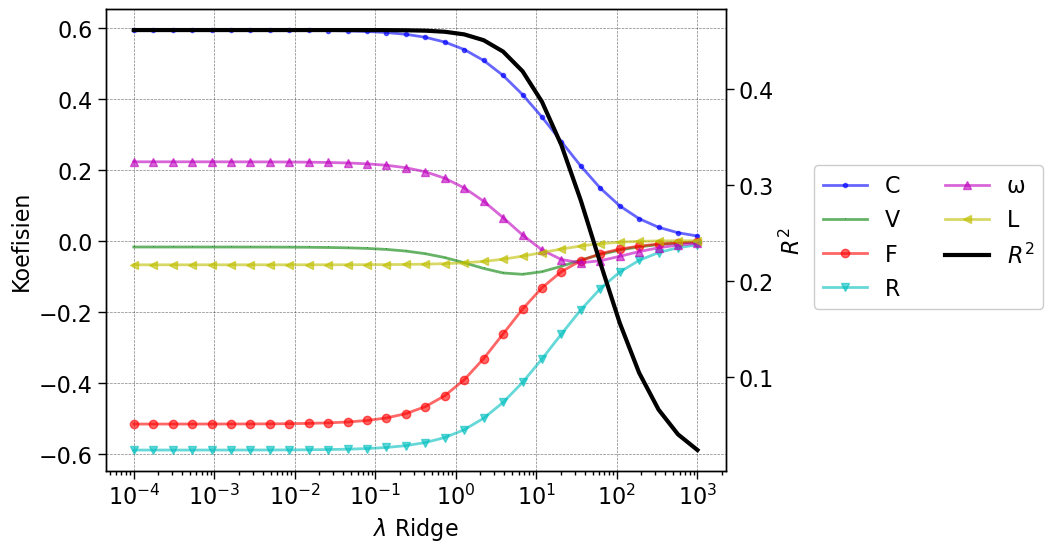

In [38]:
fig, ax1 = plt.subplots()
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
marker = list(Line2D.markers)
#marker=['-o', '-s', '-^', '-D', '-p', '-*']
for i, coef in enumerate(np.array(coefs).T):
    ax1.plot(alphas, coef, marker=marker[i % len(marker)],color=colors[i % len(colors)], label=df.columns[i], alpha=0.6)
ax1.set_xscale("log")
ax1.set_xlabel("$\lambda$ Ridge")
ax1.set_ylabel("Koefisien")

ax2=ax1.twinx()
ax2.plot(alphas, r_2, color='black', label='$R^2$', linewidth=3)
ax2.set_ylabel('$R^2$')
ax2.grid(False)

fig.legend(bbox_to_anchor=(1.01, 0.5), loc="center left", borderaxespad=0, ncol=2)
plt.show()

In [42]:
#Regresi linier dengan suku polinomial
df_poly=df_rlb.copy()
df_poly.head()

X_poly= df_rlb.iloc[:, :-1] 
Y_poly = pd.DataFrame(df_rlb.iloc[:,-1])

from sklearn.preprocessing import PolynomialFeatures
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly3=poly3.fit_transform(X_poly)
poly3.get_feature_names_out()
X_poly3=pd.DataFrame(X_poly3, columns=poly3.get_feature_names_out())
X_poly3.tail()

,C,V,F,R,ω,L,C^2,C V,C F,C R,...,R^3,R^2 ω,R^2 L,R ω^2,R ω L,R L^2,ω^3,ω^2 L,ω L^2,L^3
28,-0.857492,-0.998299,-0.659580,2.080306,0.179647,0.311882,0.735292,0.856033,0.565585,-1.783845,...,9.002885,0.777452,1.349724,0.067138,0.116557,0.202352,0.005798,0.010065,0.017474,0.030337
29,-0.425912,-0.668035,-0.361721,-0.581206,-0.910122,2.517334,0.181401,0.284524,0.154062,0.247542,...,-0.196331,-0.307439,0.850355,-0.481425,1.331589,-3.683083,-0.753874,2.085164,-5.767419,15.952280
30,-0.425912,-0.420336,-0.361721,-0.581206,-0.910122,2.884910,0.181401,0.179026,0.154062,0.247542,...,-0.196331,-0.307439,0.974522,-0.481425,1.526025,-4.837202,-0.753874,2.389635,-7.574677,24.010253
31,-0.857492,-0.502902,-0.659580,0.601689,-0.910122,0.311882,0.735292,0.431235,0.565585,-0.515943,...,0.217829,-0.329491,0.112910,0.498392,-0.170790,0.058527,-0.753874,0.258339,-0.088528,0.030337
32,0.293387,-0.502902,-0.659580,0.601689,-0.910122,0.311882,0.086076,-0.147545,-0.193512,0.176527,...,0.217829,-0.329491,0.112910,0.498392,-0.170790,0.058527,-0.753874,0.258339,-0.088528,0.030337


In [46]:
X= X_poly3
y =Y_poly ['D']

model = sm.OLS(y, X)
results_fu = model.fit()
coefs = []
r_2=[]
alphas = np.logspace(-2, 0, 30)
for n in  alphas.tolist():
    results_fr = model.fit_regularized(L1_wt=1, alpha=n, start_params=results_fu.params)

    results_fr_fit = sm.regression.linear_model.OLSResults(model, 
                                                           results_fr.params, 
                                                           model.normalized_cov_params)
    coefs.append(results_fr.params)
    r_2.append(results_fr_fit.rsquared)

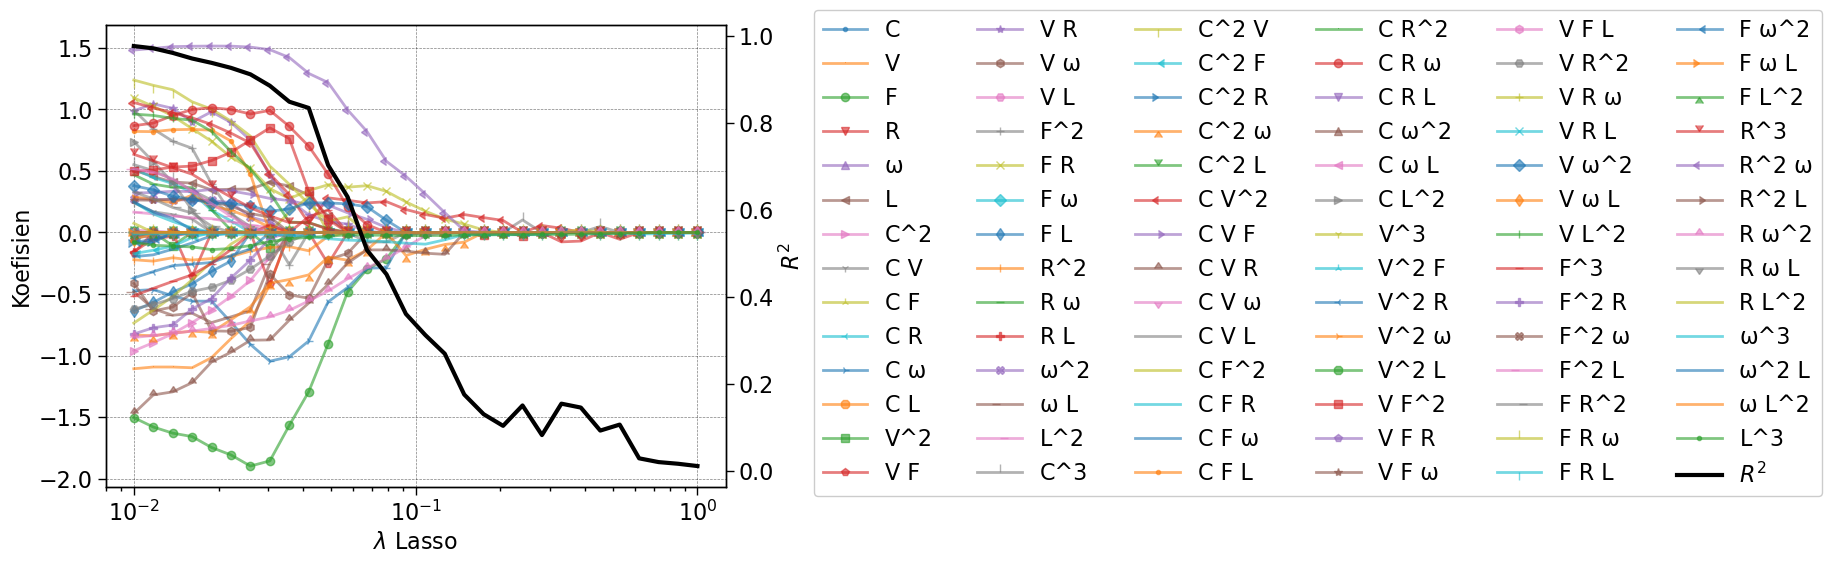

In [53]:
fig, ax1 = plt.subplots()
marker = list(Line2D.markers)

for i, coef in enumerate(np.array(coefs).T):
    ax1.plot(alphas, coef, marker=marker[i % len(marker)], label=X_poly3.columns[i], alpha=0.6)
ax1.set_xscale("log")
ax1.set_xlabel("$\lambda$ Lasso")
ax1.set_ylabel("Koefisien")

ax2=ax1.twinx()
ax2.plot(alphas, r_2, color='black', label='$R^2$', linewidth=3)
ax2.set_ylabel('$R^2$')
ax2.grid(False)
fig.legend(bbox_to_anchor=(1.01, 0.5), loc="center left", borderaxespad=0, ncol=6)

In [54]:
model = sm.OLS(y, sm.add_constant(X))
results_fu = model.fit()
frames = []
for n in (np.arange(0.01, 0.11, 0.015)).tolist():
    results_fr = model.fit_regularized(L1_wt=1, alpha=n, start_params=results_fu.params)

    results_fr_fit = sm.regression.linear_model.OLSResults(model, 
                                                           results_fr.params, 
                                                           model.normalized_cov_params)
    frames.append(np.append(results_fr.params, results_fr_fit.rsquared))

    df = pd.DataFrame(frames, columns=['Intersep']+list(X.columns)+['R2'])
df.index=np.arange(0.01, 0.11, 0.015).tolist()
df.index.name = 'Lambda'
np.round(df.T,3)

Lambda,0.010,0.025,0.040,0.055,0.070,0.085,0.100
Intersep,0.110,0.000,0.000,0.000,0.000,0.000,0.000
C,0.000,0.000,0.000,0.000,0.000,0.000,0.000
V,-0.964,-0.564,0.000,0.000,0.000,0.000,0.000
F,-1.442,-1.832,-1.303,-0.563,-0.363,-0.049,0.000
R,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...
ω^3,0.000,0.000,0.000,0.000,0.000,-0.070,0.000
ω^2 L,0.326,0.000,0.000,0.000,0.000,0.000,0.000
ω L^2,0.000,0.000,0.000,0.000,0.000,0.000,0.000
L^3,-0.092,-0.108,-0.038,-0.021,-0.016,-0.023,-0.026


In [55]:
results_fr = model.fit_regularized(L1_wt=1, alpha=0.04, start_params=results_fu.params)
final = sm.regression.linear_model.OLSResults(model, 
                                              results_fr.params, 
                                              model.normalized_cov_params)

final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      D   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                 -1.557
Method:                 Least Squares   F-statistic:                    0.3506
Date:                Sun, 18 Jun 2023   Prob (F-statistic):              0.927
Time:                        15:51:03   Log-Likelihood:                -16.565
No. Observations:                  33   AIC:                             95.13
Df Residuals:                       2   BIC:                             141.5
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0      5.706          0      1.000     -24.550      24.550
C                   0      5.898          0      1.000     -25.378      25.378
V                   0      3.190          0      1.000     -13.724      13.724
F             -1.3030      3.214     -0.405      0.724     -15.133      12.527
R                   0      1.594          0      1.000      -6.857       6.857
ω                   0      4.523          0      1.000     -19.459      19.459
L              0.3292      1.560      0.211      0.852      -6.382       7.041
C^2                 0      3.943          0      1.000     -16.967      16.967
C V                 0      3.124          0      1.000     -13.441      13.441
C F                 0      5.820          0      1.000     -25.043      25.043
C R                 0      9.467          0      1.000     -40.733      40.733
C ω           -0.8580      1.850     -0.464      0.688      -8.816       7.100
C L                 0      2.750          0      1.000     -11.832      11.832
V^2                 0      1.633          0      1.000      -7.024       7.024
V F                 0      3.982          0      1.000     -17.133      17.133
V R            0.1888      1.557      0.121      0.915      -6.509       6.886
V ω           -0.4568      1.770     -0.258      0.820      -8.073       7.159
V L                 0      1.328          0      1.000      -5.715       5.715
F^2                 0      3.109          0      1.000     -13.378      13.378
F R            0.3559      4.671      0.076      0.946     -19.744      20.456
F ω                 0      1.827          0      1.000      -7.861       7.861
F L                 0      2.188          0      1.000      -9.412       9.412
R^2           -0.1452      1.278     -0.114      0.920      -5.645       5.354
R ω                 0      5.202          0      1.000     -22.384      22.384
R L                 0      2.232          0      1.000      -9.605       9.605
ω^2                 0     11.706          0      1.000     -50.366      50.366
ω L                 0      1.967          0      1.000      -8.465       8.465
L^2           -0.0097      0.953     -0.010      0.993      -4.110       4.090
C^3                 0      5.323          0      1.000     -22.903      22.903
C^2 V          0.2732     11.306      0.024      0.983     -48.373      48.919
C^2 F               0     12.451          0      1.000     -53.573      53.573
C^2 R               0      0.784          0      1.000      -3.371       3.371
C^2 ω         -0.4010      6.509     -0.062      0.956     -28.408      27.607
C^2 L               0      3.373          0      1.000     -14.514      14.514
C V^2          0.0549      8.107      0.007      0.995     -34.825      34.935
C V F          0.2958      3.849      0.077      0.946     -16.263      16.855
C 

In [56]:
results_summary = final.summary()
results_as_html = results_summary.tables[1].as_html()
poly3=pd.read_html(results_as_html, header=0, index_col=0)[0]
poly3_final =poly3[poly3['coef'] != 0]
poly3_final

,coef,std err,t,P>|t|,[0.025,0.975]
F,-1.3030,3.214,-0.405,0.724,-15.133,12.527
L,0.3292,1.560,0.211,0.852,-6.382,7.041
C ω,-0.8580,1.850,-0.464,0.688,-8.816,7.100
V R,0.1888,1.557,0.121,0.915,-6.509,6.886
V ω,-0.4568,1.770,-0.258,0.820,-8.073,7.159
F R,0.3559,4.671,0.076,0.946,-19.744,20.456
R^2,-0.1452,1.278,-0.114,0.920,-5.645,5.354
L^2,-0.0097,0.953,-0.010,0.993,-4.110,4.090
C^2 V,0.2732,11.306,0.024,0.983,-48.373,48.919
C^2 ω,-0.4010,6.509,-0.062,0.956,-28.408,27.607


In [58]:
#Persamaan regresi polinomial lasso 
eqn=''
for i,var in enumerate(poly3_final.index):
    eqn=eqn+str(poly3_final['coef'][i])+'*'+str(var)+' '+'+ '
eqn

'-1.303*F + 0.3292*L + -0.858*C ω + 0.1888*V R + -0.4568*V ω + 0.3559*F R + -0.1452*R^2 + -0.0097*L^2 + 0.2732*C^2 V + -0.401*C^2 ω + 0.0549*C V^2 + 0.2958*C V F + -0.589*C V R + 0.2395*C F^2 + 0.7383*C R ω + 0.3584*V F^2 + 0.1972*V ω^2 + 0.1119*V L^2 + 0.0885*F^3 + 0.0863*R^3 + 1.3335*R^2 ω + -0.6226*R ω^2 + -0.0381*L^3 + '

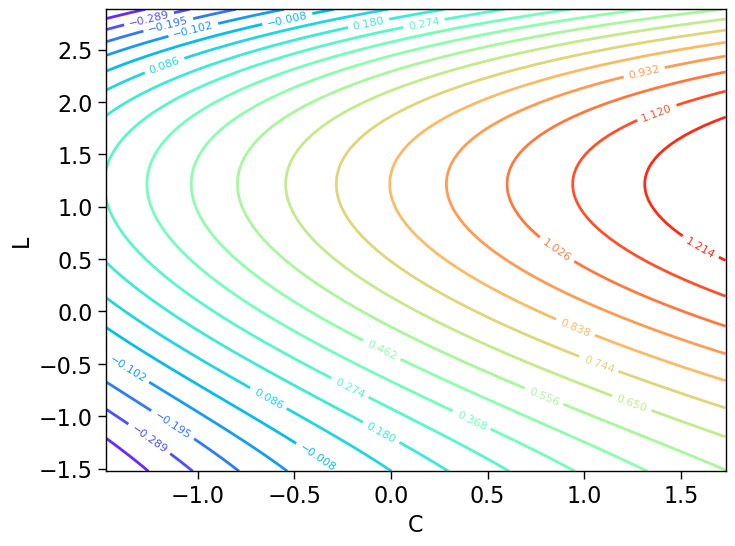

In [62]:
#Contoh Visualisasi persamaan regresi polinomial

#Parameter yg dianggap tetap
ω=np.median(df_rlb['ω'])
V=np.median(df_rlb['V'])
R=np.median(df_rlb['R'])
F=np.median(df_rlb['F'])

#Parameter yang tidak tetap
C, L= np.meshgrid(np.linspace(np.min(df_rlb['C']), np.max(df_rlb['C']), 100), 
                  np.linspace(np.min(df_rlb['L']), np.max(df_rlb['L']), 100))

#Substitusi persamaan
Y = -1.303*F +0.3292*L +-0.858*C*ω +0.1888*V*R -0.4568*V*ω +0.3559*F*R -0.1452*R**2 -0.0097*L**2 +0.2732*C**2*V -0.401*C**2*ω +0.0549*C*V**2 +0.2958*C*V*F -0.589*C*V*R +0.2395*C*F**2 +0.7383*C*R*ω +0.3584*V*F**2 +0.1972*V*ω**2 +0.1119*V*L**2 +0.0885*F**3 +0.0863*R**3 +1.3335*R**2*ω -0.6226*R*ω**2 -0.0381*L**3

contours=plt.contour(C, L, Y, levels=np.linspace(Y.min(), Y.max(), 20), cmap='rainbow')
plt.clabel(contours, inline=True, fontsize=8)
plt.xlabel('C')
plt.grid(False)
plt.ylabel('L');

# 3. Regresi Logistik

In [63]:
#Gunakan data yang sudah dikumpulkan 
df_pet=pd.read_excel('data_pet.xlsx')
df_pet.tail()

,C,V,F,R,ω,L,D,Q
28,12.0,12.0,0.5,4.000000,500,15,240.0,Halus
29,15.0,14.0,2.0,1.000000,0,21,193.0,Halus
30,15.0,15.5,2.0,1.000000,0,22,220.0,Halus
31,12.0,15.0,0.5,2.333333,0,15,120.0,Bermanik
32,20.0,15.0,0.5,2.333333,0,15,490.0,Halus


In [64]:
#Ubah nilai Q menjadi 0 dan 1
df_pet.drop('D', axis=1, inplace=True)
df_pet['Q']=pd.get_dummies(df_pet['Q'])['Halus']

In [65]:
#Transformasi data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df=pd.DataFrame(scaler.fit_transform(df_pet.iloc[:, :-1]), columns=df_pet.columns[:-1])
df['Halus']=df_pet['Q']
df.tail()

,C,V,F,R,ω,L,Halus
28,-0.857492,-0.998299,-0.659580,2.080306,0.179647,0.311882,1
29,-0.425912,-0.668035,-0.361721,-0.581206,-0.910122,2.517334,1
30,-0.425912,-0.420336,-0.361721,-0.581206,-0.910122,2.884910,1
31,-0.857492,-0.502902,-0.659580,0.601689,-0.910122,0.311882,0
32,0.293387,-0.502902,-0.659580,0.601689,-0.910122,0.311882,1


In [67]:
import statsmodels.api as sm
from statsmodels.genmod.families.links import logit
model = sm.GLM.from_formula("Halus ~ C + V + F + R + ω + L", family=sm.families.family.Binomial(link=logit()), data=df)
hasil = model.fit_regularized(alpha=0.04,method='elastic_net',L1_wt=1,refit=True) 
hasil.summary()

C:\Users\Kevin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1346: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Halus   No. Observations:                   33
Model:                            GLM   Df Residuals:                       27
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                   elastic_net   Log-Likelihood:                -7.6232
Date:                Sun, 18 Jun 2023   Deviance:                       15.246
Time:                        15:58:14   Pearson chi2:                     36.7
No. Iterations:                    50   Pseudo R-squ. (CS):             0.5346
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3576      1.676      2.004      0.045       0.073       6.642
C              3.8344      2.003      1.914      0.056      -0.092       7.760
V             -2.8344      1.759     -1.611      0.107      -6.283       0.614
F             -0.2089      1.341     -0.156      0.876      -2.837       2.419
R              1.1778      0.916      1.286      0.198      -0.617       2.972
ω                   0          0        nan        nan           0           0
L              3.5695      2.132      1.674      0.094      -0.610       7.749
==============================================================================
"""

In [68]:
df['prob_halus']=np.round(result.predict()*100,3)
df

,C,V,F,R,ω,L,Halus,prob_halus
0,-1.145211,1.313551,1.624006,-1.088160,1.051462,-0.790844,0,0.010
1,-1.145211,1.313551,1.624006,-0.581206,1.051462,-0.790844,0,0.018
2,-1.145211,1.313551,1.624006,0.601689,1.051462,-0.790844,0,0.074
3,0.293387,1.313551,1.624006,-1.088160,1.051462,-0.790844,0,2.450
4,0.293387,1.313551,1.624006,-0.581206,1.051462,-0.790844,0,4.364
5,0.293387,1.313551,1.624006,0.601689,1.051462,-0.790844,0,15.525
6,1.731985,1.313551,1.624006,-1.088160,1.051462,-0.790844,1,86.197
7,1.731985,1.313551,1.624006,-0.581206,1.051462,-0.790844,1,91.900
8,1.731985,1.313551,1.624006,0.601689,1.051462,-0.790844,1,97.859
9,-1.476089,-0.668035,-0.748938,-0.581206,-0.060102,0.311882,1,54.396


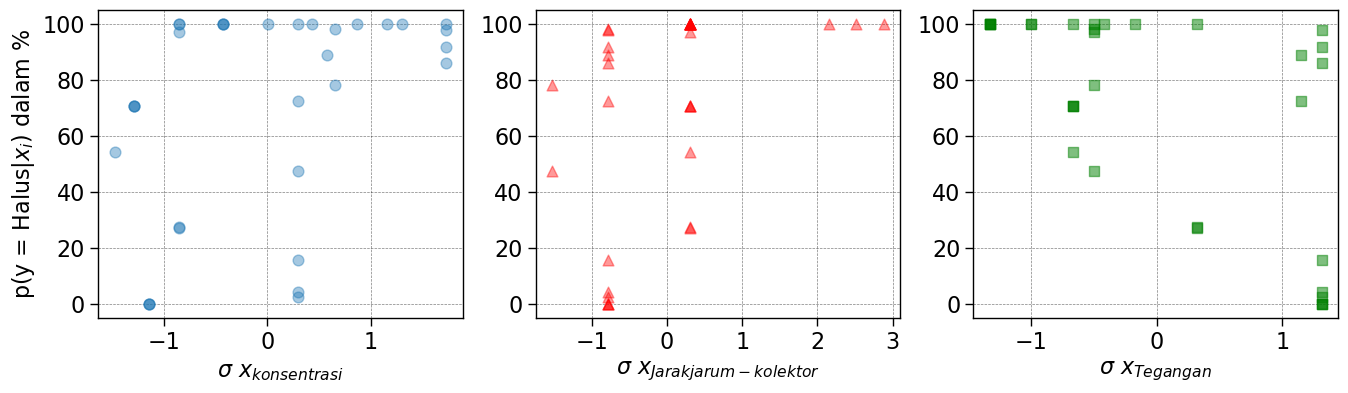

In [69]:
fig, ax=plt.subplots(1,3, figsize=(16,4))
ax[0].scatter(df['C'], df['prob_halus'], marker='o',s=60, alpha=0.4, label='Konsentrasi')
ax[1].scatter(df['L'], df['prob_halus'], c='red',marker='^',s=60, alpha=0.4, label='Jarak jarum-kolektor')
ax[2].scatter(df['V'], df['prob_halus'], c='green',marker='s',s=60, alpha=0.5, label='Tegangan')
ax[0].set_xlabel('$\sigma$ $x_{konsentrasi}$');
ax[1].set_xlabel('$\sigma$ $x_{Jarak jarum-kolektor}$');
ax[2].set_xlabel('$\sigma$ $x_{Tegangan}$');
ax[0].set_ylabel('p(y = Halus|$x_i$) dalam %');

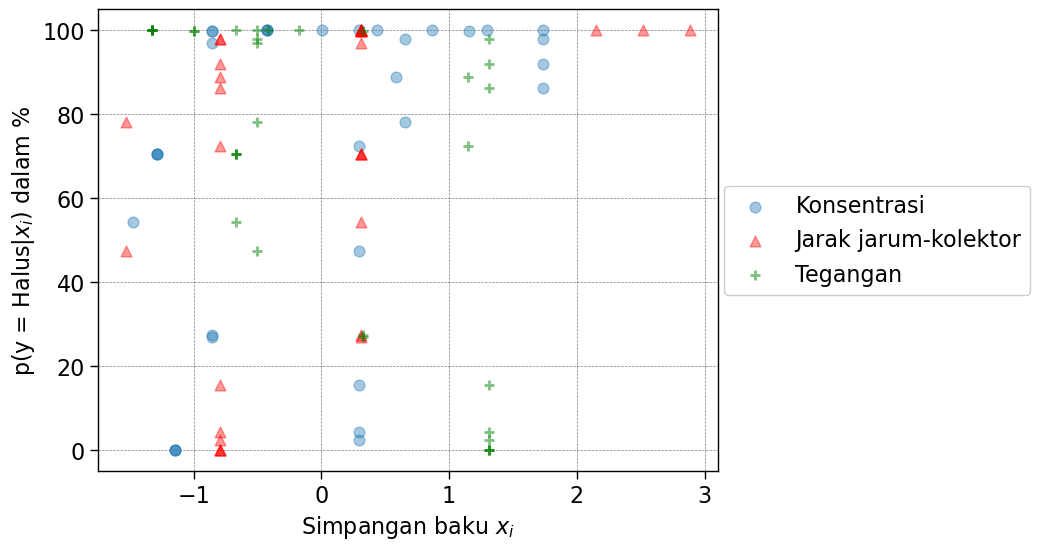

In [70]:
plt.scatter(df['C'], df['prob_halus'], marker='o',s=60, alpha=0.4, label='Konsentrasi')
plt.scatter(df['L'], df['prob_halus'], c='red',marker='^',s=60, alpha=0.4, label='Jarak jarum-kolektor')
plt.scatter(df['V'], df['prob_halus'], c='green',marker='+',s=60, alpha=0.5, label='Tegangan')
plt.xlabel('Simpangan baku $x_i$');
plt.ylabel('p(y = Halus|$x_i$) dalam %');
plt.legend(bbox_to_anchor=(1.01, 0.5), loc="center left", borderaxespad=0);

In [72]:
len('Sayapintarkevin08')

17